# Mathematical Underpinnings - Lab 2

## Task 1

### a)

$R(a,a^*) = \mathbb{E} \mathcal{L}(f(X), Y) = \mathbb{E}(aX - Y)^2 = ...$,

In our task we know $a^* = 1$.

$$ Y \sim N(0, 1 + \sigma^2) $$

X,Y independent

$$ E(a^2X^2 - 2aXY + Y^2) = a^2\mathbb{E}X^2 - 2a\mathbb{E}XY + \mathbb{E}Y^2$$

We have
$$ \mathbb{Var}X = \mathbb{E}X^2 - (\mathbb{E}X)^2 => \mathbb{E}X^2 = \mathbb{Var}X + (\mathbb{E}X)^2 $$

$$ \mathbb{E}XY = \mathbb{E}X(X+\epsilon) = \mathbb{E}X^2 + \mathbb{E}X\mathbb{E}\epsilon $$

So
$$ \mathbb{E} \mathcal{L}(f(X), Y) = a^2\mathbb{E}X^2 - 2\mathbb{E}XY + \mathbb{E}Y^2 = a^2 - 2a + 1 + \sigma^2 = (a-1)^2 + \sigma^2$$

In [16]:
def population_risk(a, sigma_eps):
    return (a-1)**2 + sigma_eps**2

### b)

In [17]:
# sampling

In [18]:
import numpy as np

In [19]:
from numpy import random

n = 50
sigma2 = 1
X = random.normal(loc=0, scale=1, size=n)
eps = random.normal(loc=0, scale=sigma2, size=n)
Y = X + eps

Empirical risk: $\frac{1}{n} \sum_{i=1}^n (ax_i - y_i)^2$

In [20]:
def empirical_risk(a, x, y):
    return np.sum((a*x - y)**2)/len(x)

In [21]:
empirical_risk(1, X, Y)

0.709952515494942

### c)

In [22]:
argmin_pop = 1
min_pop = sigma2

In [78]:
from scipy.optimize import fmin
import math

argmin_emp = fmin(lambda a: empirical_risk(a, X, Y),1, disp=False)
min_emp = empirical_risk(argmin_emp, X,Y)
argmin_emp

array([0.96953125])

In [79]:
import pandas as pd

In [80]:
results = pd.DataFrame({"context": ["Population", "Empirical", "Pop+Emp"],
             "arg_min": [argmin_pop,argmin_emp[0], argmin_pop],
             "min": [min_pop,min_emp, empirical_risk(argmin_pop, X, Y)]})

In [81]:
empirical = [empirical_risk(a, X, Y) for a in np.arange(0,2, 0.01)]
population = [population_risk(a,1) for a in np.arange(0,2, 0.01)]

In [82]:
estim = pd.DataFrame({"a": np.arange(0,2, 0.01), "emp": empirical, "pop": population})

In [83]:
import plotnine as p9

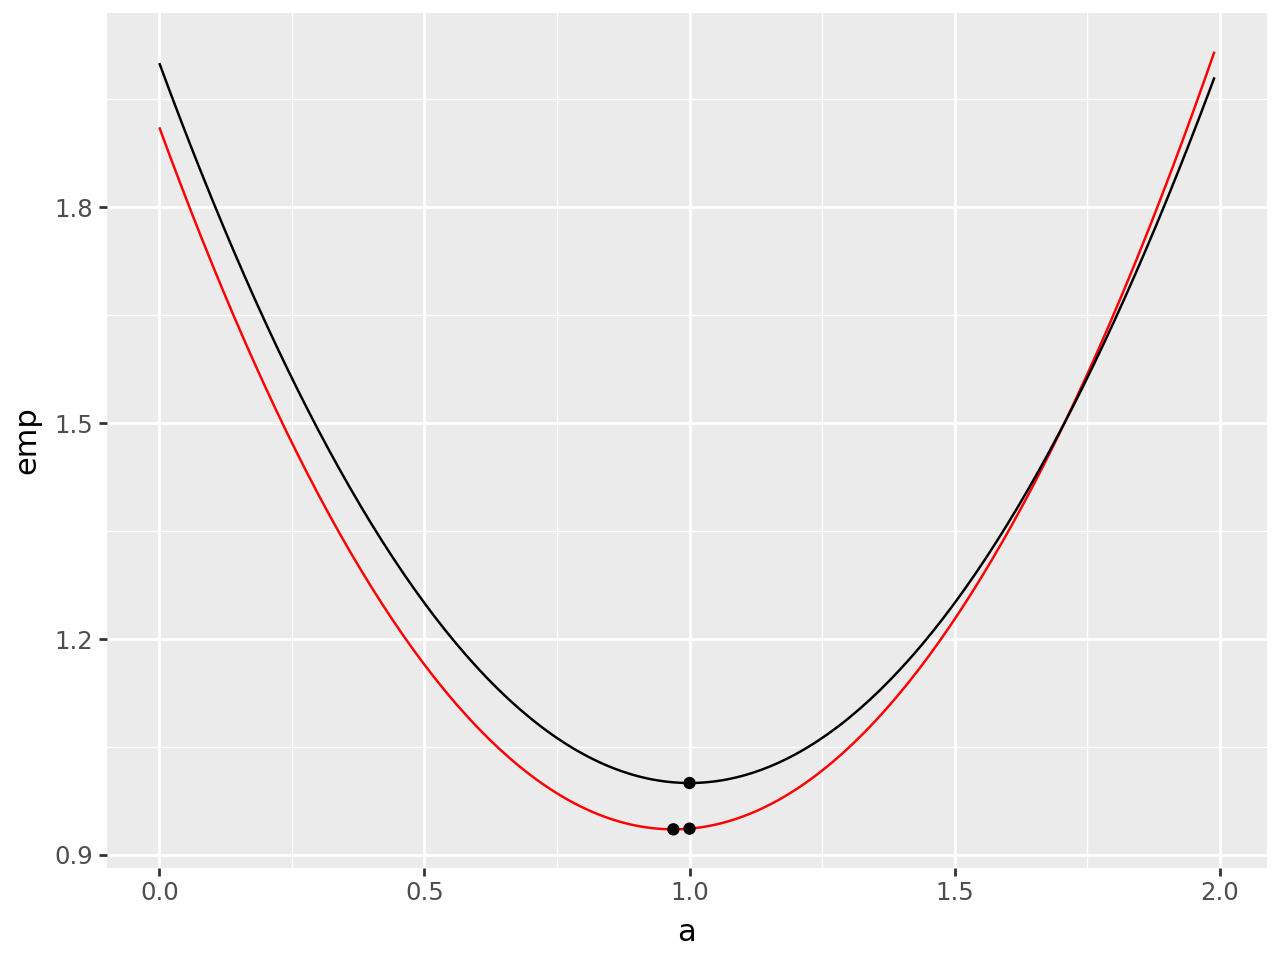

In [84]:
(
    p9.ggplot(estim, p9.aes(x="a"))
    + p9.geom_line(p9.aes(y="emp"), color = "red") 
    + p9.geom_line(p9.aes(y="pop"))# line plot
    + p9.geom_point(results, p9.aes("arg_min", "min"))
    )

### d)

Excess risk: $$E(\hat a, a^*) =R(\hat a, a^*) - \textrm{inf}_{a \in A_0} R(a, a^*)$$

In [87]:
def R_est(X,Y):
    argmin_emp = fmin(lambda a: empirical_risk(a, X, Y),1, disp=False)
    min_emp = empirical_risk(argmin_emp, X,Y)
    return min_emp

In [88]:
excess_risks = []
L = 200
for _ in range(L):
    n = 50
    sigma2 = 1
    X = random.normal(loc=0, scale=1, size=n)
    eps = random.normal(loc=0, scale=sigma2, size=n)
    Y = X + eps
    excess_risk = R_est(X,Y) - population_risk(1, sigma2)
    excess_risks += [excess_risk]

In [33]:
idx = np.array(range(1,L+1))
avgs = np.cumsum(excess_risks)/idx
results = pd.DataFrame({"idx": idx, "avgs": avgs})

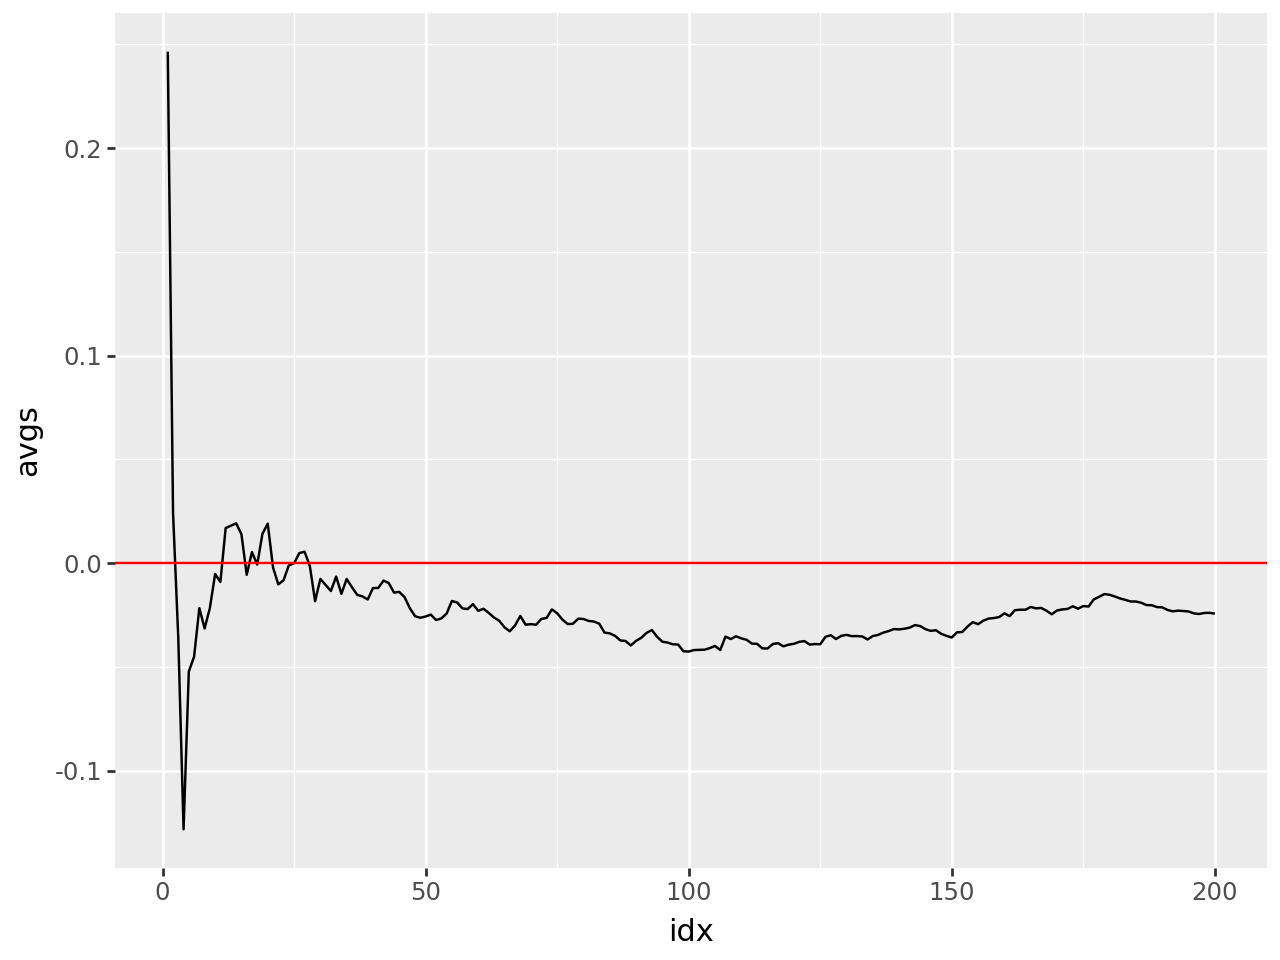

In [34]:
(
    p9.ggplot(results, p9.aes(x="idx"))
    + p9.geom_line(p9.aes(y="avgs")) 
    + p9.geom_hline(yintercept=0, color="red")
    )

In [76]:
X = random.normal(loc=0, scale=1, size=1000)
eps = random.normal(loc=0, scale=sigma2, size=1000)
Y = X + eps
R_est(X,Y)

Optimization terminated successfully.
         Current function value: 1.008645
         Iterations: 11
         Function evaluations: 22


1.0086451357784247

In [123]:
excess_risks_all = {}
L = 200
sample_sizes = [10, 50, 100, 200, 250, 500, 1000]
for sample_size in sample_sizes:
    excess_risks = []
    for _ in range(L):
        sigma2 = 1
        X = random.normal(loc=0, scale=1, size=sample_size)
        eps = random.normal(loc=0, scale=sigma2, size=sample_size)
        Y = X + eps
        excess_risk = R_est(X,Y) - population_risk(1, sigma2)
        excess_risks += [excess_risk]
    excess_risks_all[len(Y)] = excess_risks

In [124]:
samples_results = pd.DataFrame(excess_risks_all).stack().reset_index()[["level_1", 0]].\
    rename(columns = {"level_1": "Sample size", 0: "Excess risk"}).\
    astype({'Sample size': 'category'})

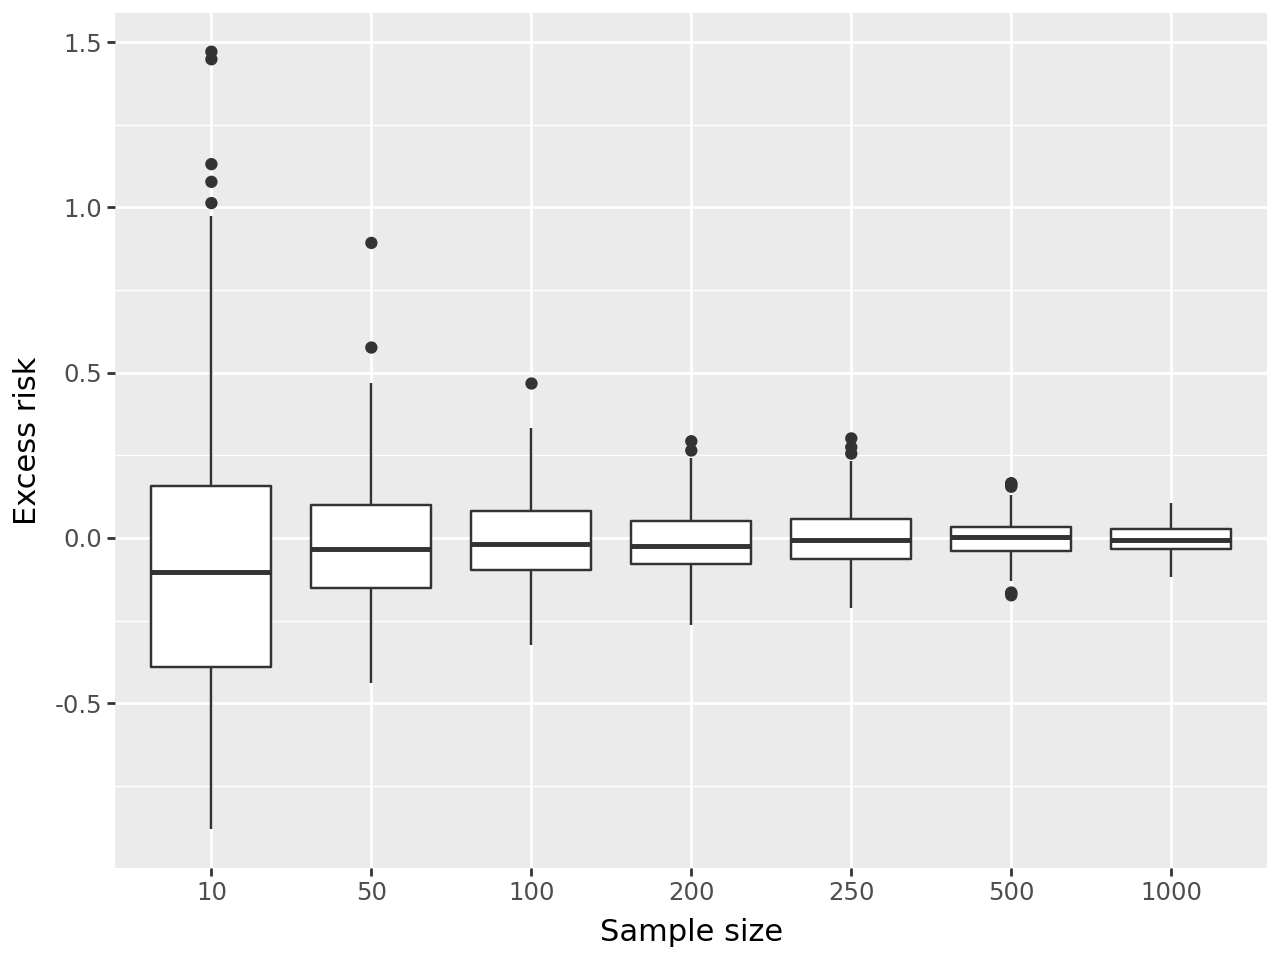

In [125]:
p9.ggplot(samples_results, p9.aes("Sample size", "Excess risk")) + p9.geom_boxplot()

In [36]:
# simulations for various sample sizes
excess_risks = []
L = 200
for i in range(L):
    n = 50 + i * 50 
    sigma2 = 1
    X = random.normal(loc=0, scale=1, size=n)
    eps = random.normal(loc=0, scale=sigma2, size=n)
    Y = X + eps
    excess_risk = R_est(X,Y) - population_risk(1, sigma2)
    excess_risks += [excess_risk]

Optimization terminated successfully.
         Current function value: 0.842794
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 1.274051
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 1.010646
         Iterations: 11
         Function evaluations: 22
Optimization terminated successfully.
         Current function value: 1.110306
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: 0.981938
         Iterations: 10
         Function evaluations: 20
Optimization terminated successfully.
         Current function value: 1.089083
         Iterations: 10
         Function evaluations: 20
Optimization terminated successfully.
         Current function value: 1.004340
         Iterations: 11
         Function evaluations: 22
Optimization terminated successful

In [37]:
idx = np.array(range(1,L+1))
results = pd.DataFrame({"idx": idx, "risk": excess_risks})

/home/bartosz/Documents/studies/sem10/muml/MatUnder/.venv/lib/python3.11/site-packages/plotnine/stats/smoothers.py:338: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


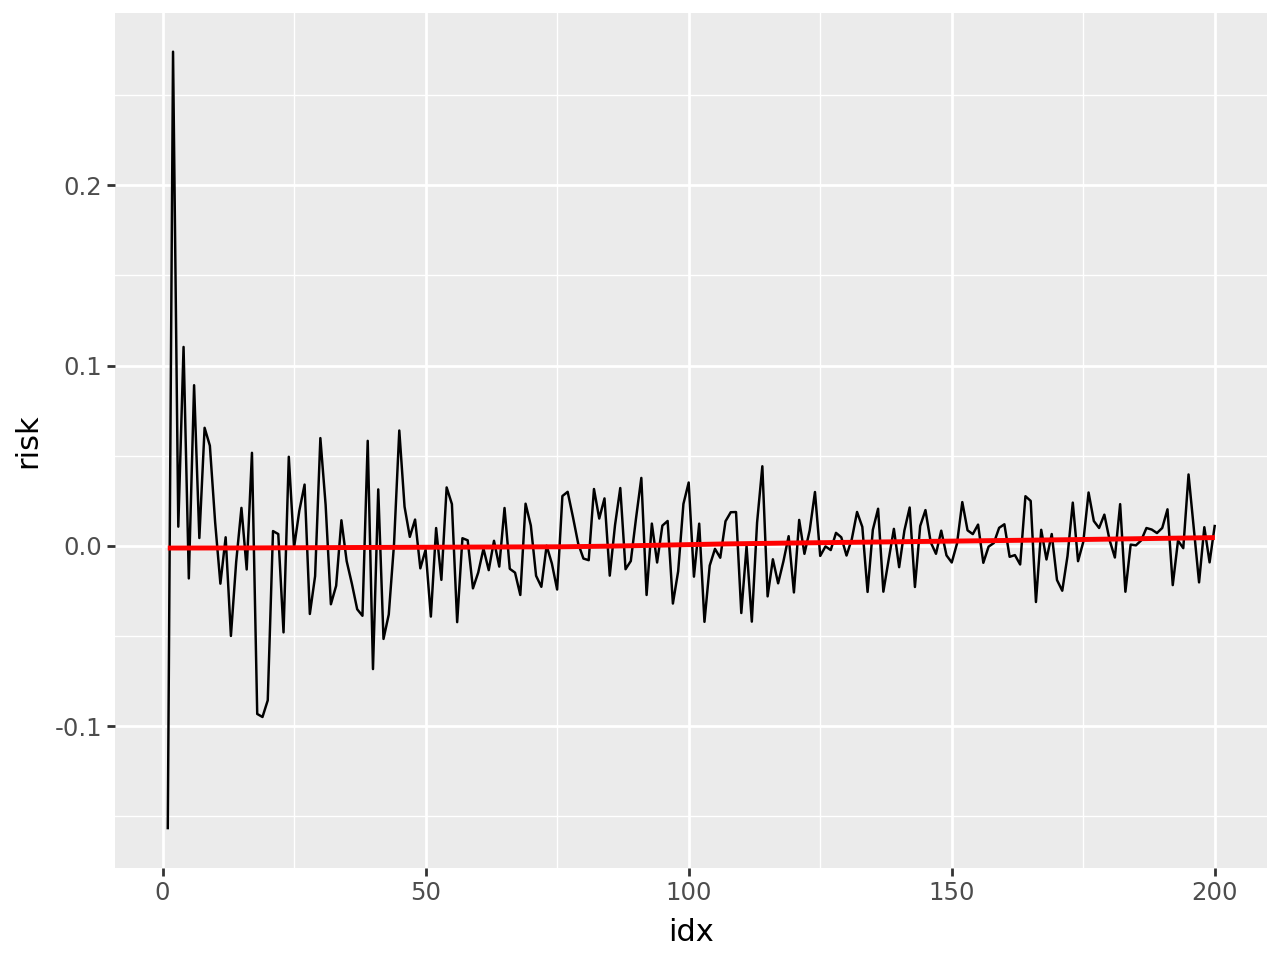

In [38]:
(
    p9.ggplot(results, p9.aes(x="idx", y="risk"))
    + p9.geom_line() 
    + p9.geom_smooth(color = "red")
    )

As we can see, the variance minimizes with the growth of the sample